In [1]:
%load_ext autoreload
%autoreload all

In [2]:
from create_model import create_model
from pymf6.mf6 import MF6
from pymf6.api import create_mutable_bc

from analytic_well_cell import AnalyticWell

In [3]:
create_model(base_name='c')

(PosixPath('models/c_100_100'), 5, 5)

In [4]:
model_path_controlled = 'models/c_100_100'
name = 'gwf_c_100_100'
mf6 = MF6(model_path_controlled + '/mfsim.nam', use_modflow_api=True, advance_first_step=False)

In [5]:
mf6

pymf6 version:,1.4.1.dev11+gb317e67d.d20240629
xmipy version:,1.5.0
modflowapi version:,0.2.0
ini file path:,/Users/mike/pymf6.ini
dll file path:,/Users/mike/hydrocomputing/projects/2021/003_ModSimple_Phase2/Bearbeitung/MODFLOW6/nightly/2024_06_11/libmf6.dylib
MODFLOW version:,6.6.0.dev0-dev


In [6]:
sim = mf6.simulation

In [7]:
sim

modeltype,namefile,modelname
gwf6,gwf_c_100_100.nam,GWF_C_100_100


In [8]:
sim.models

[Model GWF_C_100_100 
 15 packages
 49 variables.]

In [9]:
sim.solution_groups

[Solution 1 
 1 packages
 60 variables.]

In [10]:
sim.TDIS.DELT

value:,0.0


In [11]:
gwf = mf6.models['gwf6']

In [12]:
for step in mf6.steps:
    if step > 5:
        break
    print(step, gwf.X.min(), gwf.X[0, 5, 5])

0.0 12.0 12.0
1.0 9.24178548415261 9.24178548415261
1.0 9.936848637899823 9.936848637899823
1.0 9.936896712750007 9.936896712750007
2.0 9.878604346280135 9.878604346280135
2.0 9.878528415791997 9.878528415791997
3.0 9.825055477761612 9.825055477761612
3.0 9.824992165240515 9.824992165240515
4.0 9.775946903012986 9.775946903012986
4.0 9.775888855233122 9.775888855233122
5.0 9.730904670119319 9.730904670119319
5.0 9.730851428947357 9.730851428947357


/Users/mike/Dev/pymf6/.pixi/envs/analytic/lib/python3.12/site-packages/modflowapi/extensions/apimodel.py:371: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nodeuser = np.arange(nodes).astype(int)


In [13]:
gwf.package_dict.keys()

dict_keys(['dis', 'npf', 'buy', 'vsc', 'gnc', 'hfb', 'sto', 'csub', 'ic', 'mvr', 'wel_0', 'chd_0'])

In [14]:
wel = create_mutable_bc(gwf.wel)

In [15]:

def get_geomtery(gwf, cell_coords):
    
    delr = gwf.dis.get_advanced_var('delr')
    delc = gwf.dis.get_advanced_var('delc')


def get_cell_properties(gwf, well_coord):
    properties = {}
    top = gwf.dis.top.values.__getitem__(well_coord)
    bot = gwf.dis.bot.values.__getitem__(well_coord)
    properties['z'] = [top - bot, 0]
    properties['kaq'] = gwf.npf.k11.values.__getitem__(well_coord)
    properties['ss'] = gwf.sto.ss.values.__getitem__(well_coord)
    properties['sy'] = gwf.sto.sy.values.__getitem__(well_coord)
    return properties
    

def make_cell_coords(gwf):
    # layer, row, col
    wel = create_mutable_bc(gwf.wel)
    well_coord = wel.nodelist[0]
    cell_coords = {'well': well_coord}
    cell_coords['left'] = (well_coord[0], well_coord[1], well_coord[2] - 1)
    cell_coords['right']  = (well_coord[0], well_coord[1], well_coord[2] + 1)
    cell_coords['top'] = (well_coord[0], well_coord[1] + 1, well_coord[2])
    cell_coords['bot'] = (well_coord[0], well_coord[1] - 1, well_coord[2])
    cell_coords['leftbot'] = (well_coord[0], well_coord[1] - 1, well_coord[2] - 1)
    cell_coords['rightbot'] = (well_coord[0], well_coord[1] + 1, well_coord[2] - 1)
    cell_coords['lefttop'] = (well_coord[0], well_coord[1] + 1, well_coord[2] - 1)
    cell_coords['righttop'] = (well_coord[0], well_coord[1] + 1, well_coord[2] + 1)
    return cell_coords


def get_heads(coords_dict):
    return {name: gwf.X.__getitem__(coord) 
            for name, coord in coords_dict.items()}

In [16]:
cell_coords = make_cell_coords(gwf)

In [17]:
get_cell_properties(gwf, cell_coords['well'])

{'z': [10.0, 0], 'kaq': 10.0, 'ss': 1e-06, 'sy': 0.2}

In [18]:
get_heads(cell_coords)

{'well': 9.689592054655128,
 'left': 10.720126576058757,
 'right': 10.77149013654112,
 'top': 10.710460206162425,
 'bot': 10.7309255293218,
 'leftbot': 11.003213390020042,
 'rightbot': 10.983133921037656,
 'lefttop': 10.983133921037656,
 'righttop': 11.034513686461237}

In [19]:
gwf.dis.get_advanced_var('delr')

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [20]:
gwf.sto.ss.values

array([[[1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06],
        [1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06],
        [1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06],
        ...,
        [1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06],
        [1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06],
        [1.e-06, 1.e-06, 1.e-06, ..., 1.e-06, 1.e-06, 1.e-06]]])

In [21]:
import warnings
with warnings.catch_warnings(action="ignore"):
    awell = AnalyticWell(gwf)
    m, h = awell.calc_well_head(-wel.q[0])
h

Number of elements, Number of equations: 2 , 49
..
solution complete


5.698060973333909

In [22]:
h

5.698060973333909

/Users/mike/Dev/pymf6/.pixi/envs/analytic/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mike/Dev/pymf6/.pixi/envs/analytic/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mike/Dev/pymf6/.pixi/envs/analytic/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


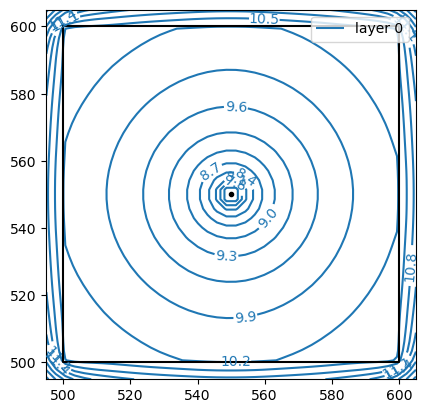

In [23]:
m.contour(win=[495, 605, 495, 605], ngr=40, labels=True, decimals=1)

In [24]:
well = m.elementdict['well']

In [25]:
well.headinside(1)

array([[5.69806097]])

In [26]:
awell.neighbor_heads

{'center': 9.689592054655128,
 'left': 10.720126576058757,
 'right': 10.77149013654112,
 'top': 10.710460206162425,
 'bot': 10.7309255293218,
 'bot_left': 11.003213390020042,
 'bot_right': 11.052712097536682,
 'top_left': 10.983133921037656,
 'top_right': 11.034513686461237}

In [27]:
list(awell.neighbor_heads)

['center',
 'left',
 'right',
 'top',
 'bot',
 'bot_left',
 'bot_right',
 'top_left',
 'top_right']

In [28]:
awell.neighbor_heads

{'center': 9.689592054655128,
 'left': 10.720126576058757,
 'right': 10.77149013654112,
 'top': 10.710460206162425,
 'bot': 10.7309255293218,
 'bot_left': 11.003213390020042,
 'bot_right': 11.052712097536682,
 'top_left': 10.983133921037656,
 'top_right': 11.034513686461237}

In [29]:
delr = gwf.dis.get_advanced_var('delr')
delc = gwf.dis.get_advanced_var('delc')


In [30]:
import numpy as np
xs = np.add.accumulate(delr)
xs

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [31]:
(xs[well_coord[1]] + xs[well_coord[1] - 1]) / 2

NameError: name 'well_coord' is not defined

In [ ]:
wel.q[0]